World Population Analysis
Loading: World_population1.csv
Loaded 234 records
Shape: (234, 17)

First few rows:
   Rank CCA3 Country/Territory           Capital Continent  2022 Population  \
0    36  AFG       Afghanistan             Kabul      Asia         41128771   
1   138  ALB           Albania            Tirana    Europe          2842321   
2    34  DZA           Algeria           Algiers    Africa         44903225   
3   213  ASM    American Samoa         Pago Pago   Oceania            44273   
4   203  AND           Andorra  Andorra la Vella    Europe            79824   

   2020 Population  2015 Population  2010 Population  2000 Population  \
0         38972230         33753499         28189672         19542982   
1          2866849          2882481          2913399          3182021   
2         43451666         39543154         35856344         30774621   
3            46189            51368            54849            58230   
4            77700            71746            715

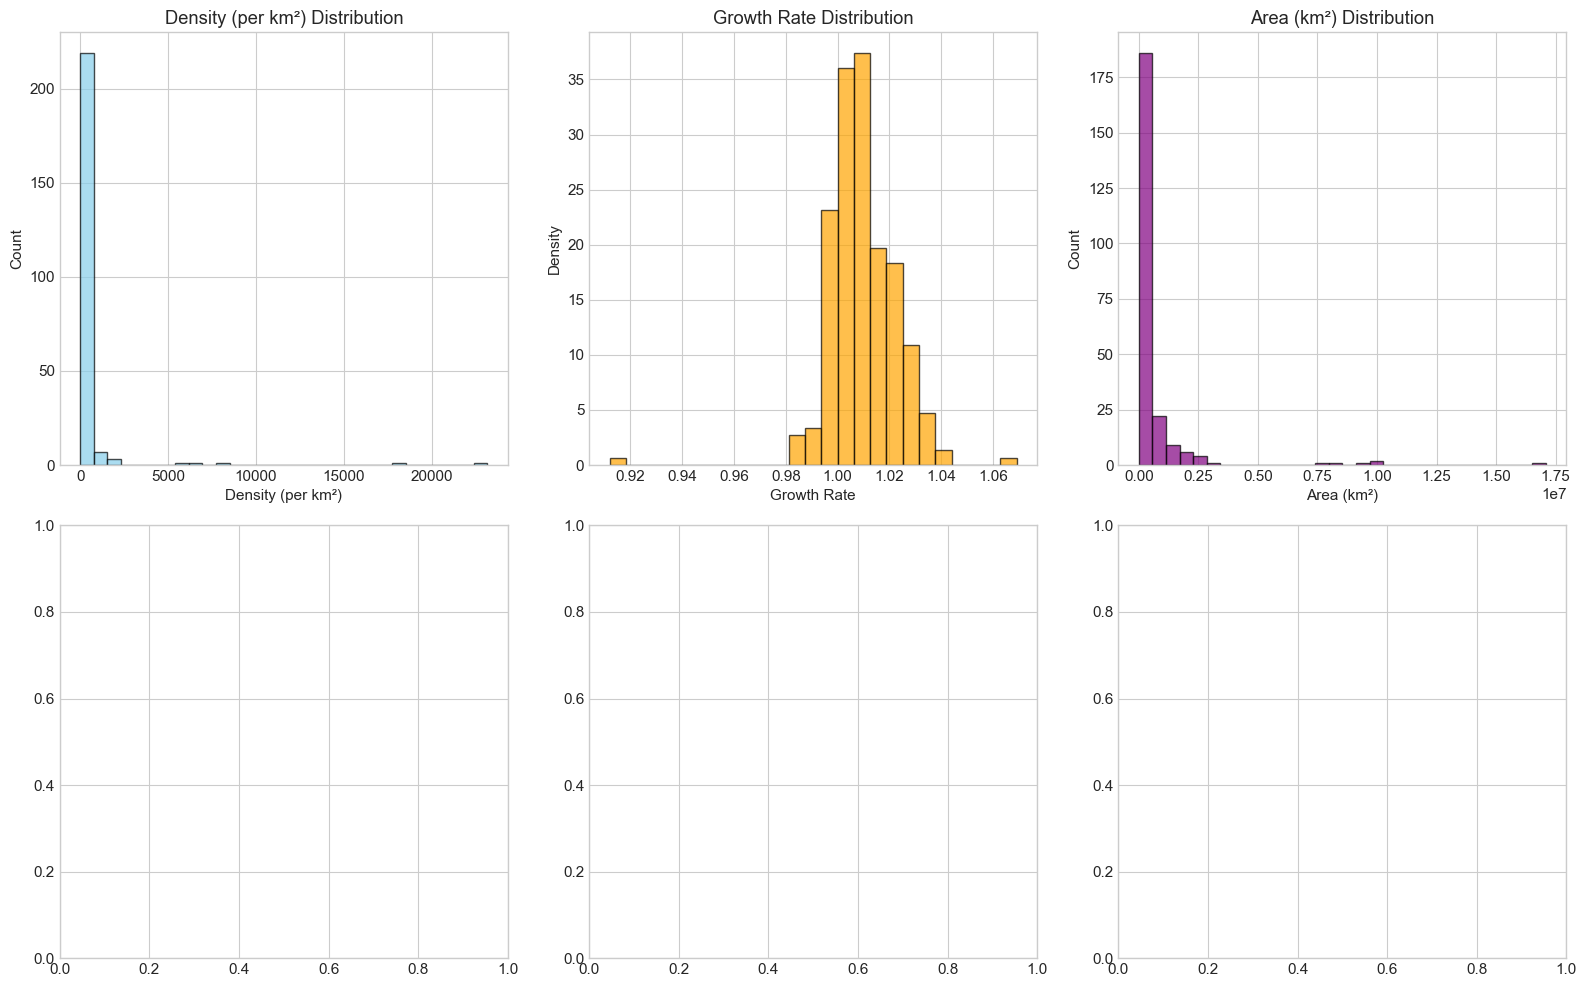


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Category Visualizations
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


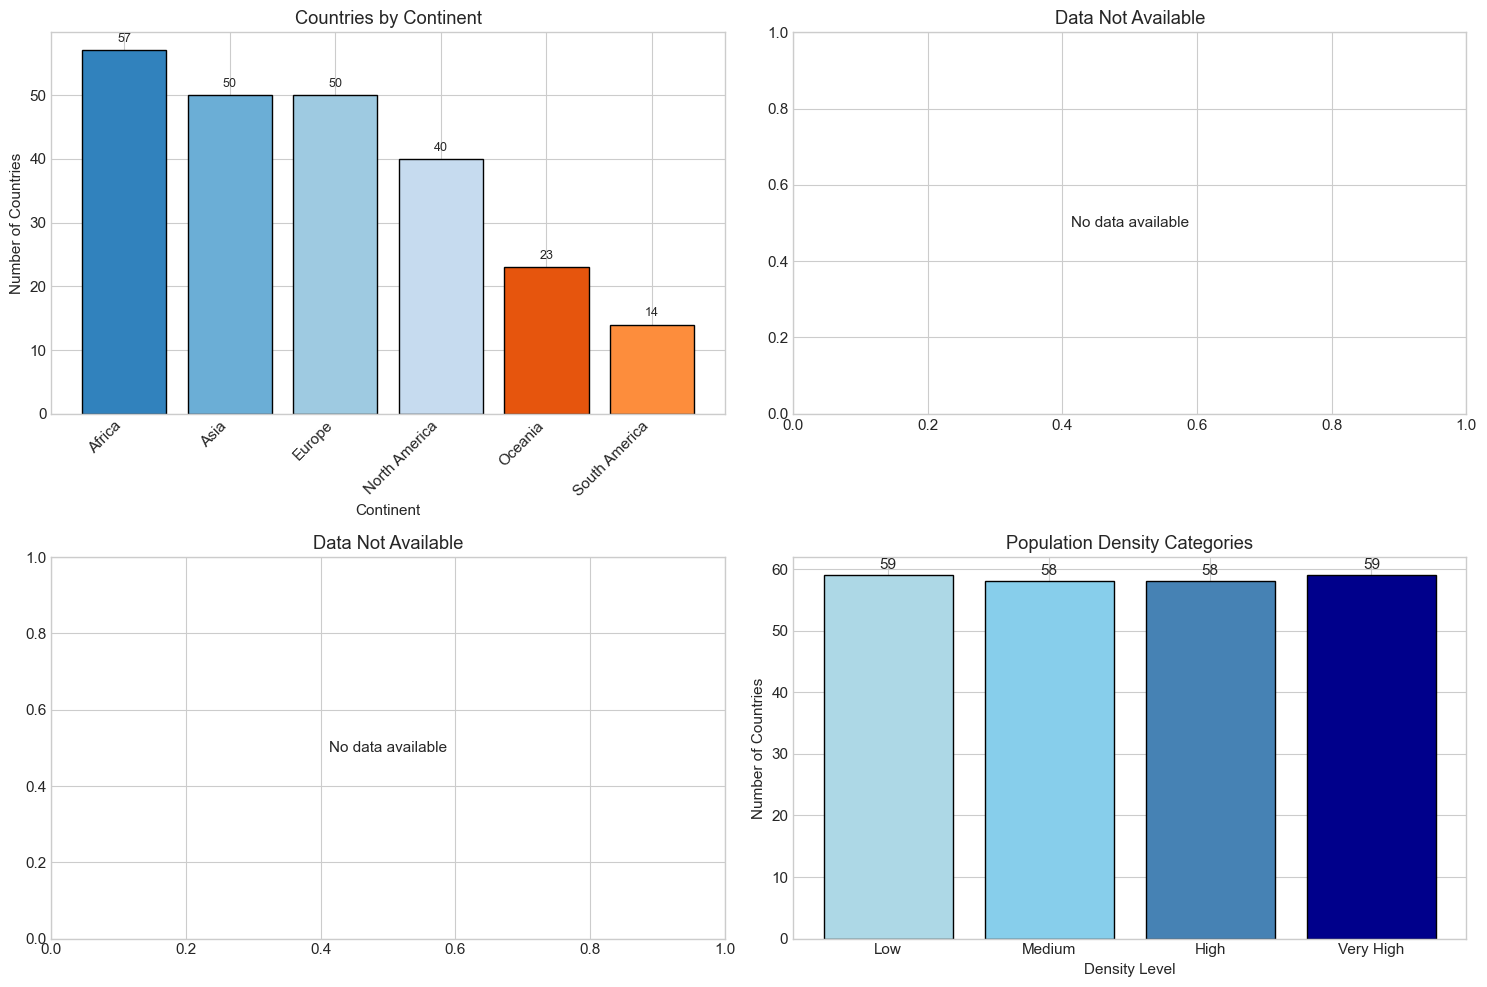


DATA SUMMARY

Density (per km²) Statistics:
Average: 452.13
Middle Value: 95.35
Spread: 2,066.12
Minimum: 0.03
Maximum: 23,172.27

Continent Counts:
  Africa: 57 countries
  Asia: 50 countries
  Europe: 50 countries
  North America: 40 countries
  Oceania: 23 countries
  South America: 14 countries

Analysis Complete


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 9)
plt.rcParams['font.size'] = 11

def get_world_population_data():
    filename = 'World_population1.csv'
    
    try:
        print(f"Loading: {filename}")
        population_data = pd.read_csv(filename)
        
        print(f"Loaded {len(population_data)} records")
        print(f"Shape: {population_data.shape}")
        
        print("\nFirst few rows:")
        print(population_data.head())
        
        return population_data
        
    except FileNotFoundError:
        print(f"File '{filename}' not found.")
        print("Check file location.")
        return None
    
    except Exception as e:
        print(f"Error loading file: {e}")
        return None

def check_column_availability(df, column_names):
    available_cols = []
    missing_cols = []
    
    for col in column_names:
        if col in df.columns:
            available_cols.append(col)
        else:
            missing_cols.append(col)
    
    return available_cols, missing_cols

def create_distribution_plots(dataframe):
    print("\n" + "~" * 60)
    print("Distribution Visualizations")
    print("~" * 60)
    
    numeric_cols = dataframe.select_dtypes(include=[np.number]).columns.tolist()
    
    if not numeric_cols:
        print("No numeric columns found.")
        return
    
    print(f"Found {len(numeric_cols)} numeric columns")
    
    fig, axes = plt.subplots(2, 3, figsize=(16, 10))
    ax = axes.ravel()
    
    plot_index = 0
    
    if 'Population' in dataframe.columns:
        ax[plot_index].hist(dataframe['Population'].dropna(), bins=35, 
                           alpha=0.7, edgecolor='black', density=True)
        
        dataframe['Population'].plot(kind='kde', ax=ax[plot_index], 
                                    color='red', linewidth=2)
        
        ax[plot_index].set_title('Population Distribution')
        ax[plot_index].set_xlabel('Population')
        ax[plot_index].set_ylabel('Density')
        ax[plot_index].ticklabel_format(style='sci', axis='x', scilimits=(6,6))
        
        plot_index += 1
    
    density_cols = [col for col in dataframe.columns if 'Density' in col]
    if density_cols:
        density_data = dataframe[density_cols[0]].dropna()
        ax[plot_index].hist(density_data, bins=30, alpha=0.7, 
                           color='skyblue', edgecolor='black')
        ax[plot_index].set_title(f'{density_cols[0]} Distribution')
        ax[plot_index].set_xlabel(density_cols[0])
        ax[plot_index].set_ylabel('Count')
        plot_index += 1
    
    if 'Population' in dataframe.columns:
        box_data = dataframe['Population'].dropna()
        ax[plot_index].boxplot(box_data, vert=True, patch_artist=True,
                              boxprops=dict(facecolor='lightgreen'))
        ax[plot_index].set_title('Population Box Plot')
        ax[plot_index].set_ylabel('Population')
        ax[plot_index].ticklabel_format(style='sci', axis='y', scilimits=(6,6))
        plot_index += 1
    
    growth_cols = [col for col in dataframe.columns if 'Growth' in col]
    if growth_cols:
        growth_data = dataframe[growth_cols[0]].dropna()
        ax[plot_index].hist(growth_data, bins=25, alpha=0.7, 
                           color='orange', edgecolor='black', density=True)
        ax[plot_index].set_title(f'{growth_cols[0]} Distribution')
        ax[plot_index].set_xlabel(growth_cols[0])
        ax[plot_index].set_ylabel('Density')
        plot_index += 1
    
    area_cols = [col for col in dataframe.columns if 'Area' in col]
    if area_cols:
        area_data = dataframe[area_cols[0]].dropna()
        ax[plot_index].hist(area_data, bins=30, alpha=0.7, 
                           color='purple', edgecolor='black')
        ax[plot_index].set_title(f'{area_cols[0]} Distribution')
        ax[plot_index].set_xlabel(area_cols[0])
        ax[plot_index].set_ylabel('Count')
        plot_index += 1
    
    if 'Population' in dataframe.columns:
        pop_data = dataframe['Population'].dropna()
        stats.probplot(pop_data, dist="norm", plot=ax[plot_index])
        ax[plot_index].set_title('Population Q-Q Plot')
        ax[plot_index].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

def create_category_plots(dataframe):
    print("\n" + "~" * 60)
    print("Category Visualizations")
    print("~" * 60)
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    ax = axes.ravel()
    
    continent_cols = [col for col in dataframe.columns 
                     if 'continent' in col.lower() or 'Continent' in col]
    
    if continent_cols:
        continent_data = dataframe[continent_cols[0]].value_counts()
        
        colors = plt.cm.tab20c(np.arange(len(continent_data)))
        bars = ax[0].bar(range(len(continent_data)), continent_data.values, 
                        color=colors, edgecolor='black')
        
        ax[0].set_title(f'Countries by {continent_cols[0]}')
        ax[0].set_xlabel(continent_cols[0])
        ax[0].set_ylabel('Number of Countries')
        ax[0].set_xticks(range(len(continent_data)))
        ax[0].set_xticklabels(continent_data.index, rotation=45, ha='right')
        
        for i, (bar, value) in enumerate(zip(bars, continent_data.values)):
            height = bar.get_height()
            ax[0].text(bar.get_x() + bar.get_width()/2, height + 0.8,
                      str(value), ha='center', va='bottom', fontsize=9)
    
    if 'Country' in dataframe.columns and 'Population' in dataframe.columns:
        top_20 = dataframe.nlargest(20, 'Population')[['Country', 'Population']].copy()
        top_20 = top_20.sort_values('Population', ascending=True)
        
        y_pos = np.arange(len(top_20))
        colors = plt.cm.viridis(np.linspace(0.3, 0.9, len(top_20)))
        
        bars = ax[1].barh(y_pos, top_20['Population'], color=colors, edgecolor='black')
        
        ax[1].set_title('Top 20 Countries by Population')
        ax[1].set_xlabel('Population')
        ax[1].set_yticks(y_pos)
        ax[1].set_yticklabels(top_20['Country'])
        ax[1].ticklabel_format(style='sci', axis='x', scilimits=(6,6))
        
        for i, (bar, pop) in enumerate(zip(bars, top_20['Population'])):
            width = bar.get_width()
            ax[1].text(width * 1.01, bar.get_y() + bar.get_height()/2,
                      f'{pop:,.0f}', va='center', fontsize=9)
    
    if continent_cols and 'Population' in dataframe.columns:
        continent_pop = dataframe.groupby(continent_cols[0])['Population'].sum()
        continent_pop = continent_pop.sort_values(ascending=False)
        
        explode = [0.05] * len(continent_pop)
        colors = plt.cm.Set3(np.linspace(0, 0.9, len(continent_pop)))
        
        wedges, texts, autotexts = ax[2].pie(continent_pop.values, 
                                            labels=continent_pop.index,
                                            autopct='%1.1f%%',
                                            startangle=90,
                                            colors=colors,
                                            explode=explode,
                                            textprops={'fontsize': 9})
        
        ax[2].set_title('Population Share by Continent')
        
        for autotext in autotexts:
            autotext.set_color('black')
            autotext.set_fontweight('bold')
    
    density_cols = [col for col in dataframe.columns if 'Density' in col]
    if density_cols:
        density_data = dataframe[density_cols[0]].dropna()
        
        try:
            dataframe['Density_Group'] = pd.qcut(density_data, q=4,
                                                labels=['Low', 'Medium', 'High', 'Very High'])
            
            group_counts = dataframe['Density_Group'].value_counts().sort_index()
            
            x_pos = np.arange(len(group_counts))
            colors = ['lightblue', 'skyblue', 'steelblue', 'darkblue']
            
            bars = ax[3].bar(x_pos, group_counts.values, color=colors, edgecolor='black')
            
            ax[3].set_title('Population Density Categories')
            ax[3].set_xlabel('Density Level')
            ax[3].set_ylabel('Number of Countries')
            ax[3].set_xticks(x_pos)
            ax[3].set_xticklabels(group_counts.index)
            
            for bar, count in zip(bars, group_counts.values):
                height = bar.get_height()
                ax[3].text(bar.get_x() + bar.get_width()/2, height + 0.5,
                          str(count), ha='center', va='bottom')
                
        except:
            ax[3].text(0.5, 0.5, 'Not enough data for density categories',
                      ha='center', va='center', transform=ax[3].transAxes)
            ax[3].set_title('Density Categories (Data Issue)')
    
    for i in range(4):
        if not ax[i].has_data():
            ax[i].text(0.5, 0.5, 'No data available', 
                      ha='center', va='center', transform=ax[i].transAxes)
            ax[i].set_title('Data Not Available')
    
    plt.tight_layout()
    plt.show()

def show_data_summary(dataframe):
    print("\n" + "=" * 60)
    print("DATA SUMMARY")
    print("=" * 60)
    
    if 'Population' in dataframe.columns:
        pop_data = dataframe['Population'].dropna()
        print("\nPopulation Statistics:")
        print(f"Average: {pop_data.mean():,.0f}")
        print(f"Middle Value: {pop_data.median():,.0f}")
        print(f"Spread: {pop_data.std():,.0f}")
        print(f"Smallest: {pop_data.min():,.0f}")
        print(f"Largest: {pop_data.max():,.0f}")
        print(f"Total Countries: {len(pop_data)}")
    
    density_cols = [col for col in dataframe.columns if 'Density' in col]
    if density_cols:
        density_data = dataframe[density_cols[0]].dropna()
        print(f"\n{density_cols[0]} Statistics:")
        print(f"Average: {density_data.mean():,.2f}")
        print(f"Middle Value: {density_data.median():,.2f}")
        print(f"Spread: {density_data.std():,.2f}")
        print(f"Minimum: {density_data.min():,.2f}")
        print(f"Maximum: {density_data.max():,.2f}")
    
    continent_cols = [col for col in dataframe.columns if 'continent' in col.lower()]
    if continent_cols:
        print(f"\n{continent_cols[0]} Counts:")
        continent_counts = dataframe[continent_cols[0]].value_counts()
        for continent, count in continent_counts.items():
            print(f"  {continent}: {count} countries")

def main():
    print("World Population Analysis")
    print("=" * 50)
    
    data = get_world_population_data()
    
    if data is not None:
        print("\n" + "-" * 50)
        print("Dataset Overview")
        print("-" * 50)
        print(data.info())
        
        print("\nBasic Statistics:")
        print(data.describe())
        
        missing_values = data.isnull().sum()
        if missing_values.any():
            print("\nMissing Values:")
            print(missing_values[missing_values > 0])
        
        create_distribution_plots(data)
        
        create_category_plots(data)
        
        show_data_summary(data)
        
        print("\n" + "=" * 50)
        print("Analysis Complete")
        print("=" * 50)

if __name__ == "__main__":
    main()